<a href="https://colab.research.google.com/github/MohammedQaraad/DeepleerningTF/blob/master/manualLabeledDataandClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install PyDrive

import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

     |████████████████████████████████| 993kB 4.7MB/s 
  Stored in directory: /root/.cache/pip/wheels/fa/d2/9a/d3b6b506c2da98289e5d417215ce34b696db856643bad779f4
Successfully built PyDrive


In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
download = drive.CreateFile({'id': '1BZOv422XJvxFUnGh-0xVeSvgFgqVY45q'})


In [0]:
download.GetContentFile('train_LbELtWX.zip')
!unzip train_LbELtWX.zip

In [5]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tqdm import tqdm

Using TensorFlow backend.


In [0]:
train = pd.read_csv('train.csv')


In [7]:
train.head(5)

,id,label
0,1,9
1,2,0
2,3,0
3,4,3
4,5,0


In [8]:
train.shape


(60000, 2)

In [9]:
img = image.load_img('train/'+train['id'][0].astype('str')+'.png', target_size=(28,28,1), color_mode = "grayscale")
img = np.array(img)
img.shape
img2 = np.array([img])
img2.shape


(1, 28, 28)

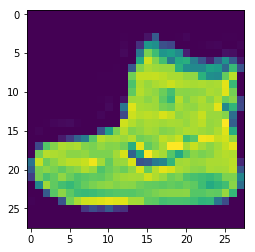

In [10]:
plt.imshow(img )

In [11]:
# We have grayscale images, so while loading the images we will keep grayscale=True, if you have RGB images, you should set grayscale as False
train_image = []
for i in tqdm(range(train.shape[0])):
    img = image.load_img('train/'+train['id'][i].astype('str')+'.png', target_size=(28,28,1), color_mode = "grayscale")
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)


100%|██████████| 60000/60000 [00:22<00:00, 2693.49it/s]


In [12]:
X.shape   #(60000, 28, 28, 1)


(60000, 28, 28, 1)

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

In [14]:
y = train['label'].values
print(y[:10])
print(y.shape)
#one hot encoder
y =to_categorical(y)
print(y.shape)


y[:5]

[9 0 0 3 0 2 7 2 5 5]
(60000,)
(60000, 10)


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

9


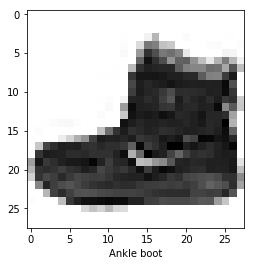

In [29]:
plt.xlabel(class_names[np.argmax(y[0])])
plt.imshow(X[0].reshape((28,28)) , cmap=plt.cm.binary )
print(np.argmax(y[0]))

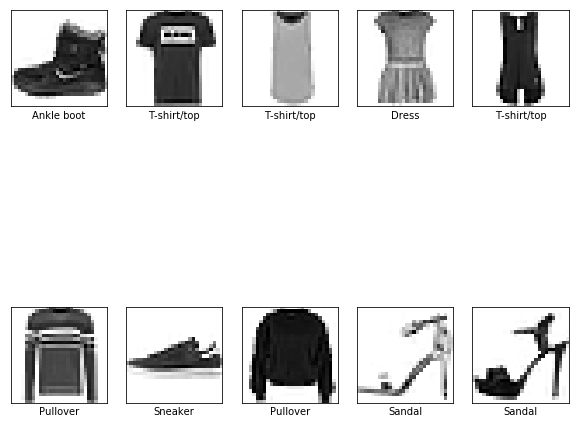

In [15]:
i=0
plt.figure(figsize=(10,10))
for im ,lab in zip(X[:10],y[:10]):
  img = np.array(im)
  img = img.reshape((28,28))
  im = np.array(im).reshape((28,28))
  lab = lab
  plt.subplot(2,5,i+1)
  plt.imshow(im.reshape((28,28)), cmap=plt.cm.binary)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.xlabel(class_names[np.argmax(lab)])
  i+=1
 
  
plt.show()


In [0]:
#do dataset shuffle 
from sklearn.utils import shuffle
shuffleData , shuffleLabel  = shuffle(X,y) 

3


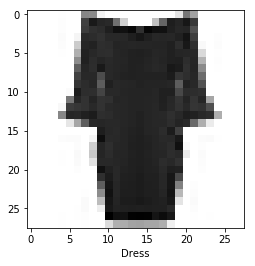

In [33]:
#test shuffle dataset 
plt.xlabel(class_names[np.argmax(shuffleLabel[1])])
plt.imshow(shuffleData[1].reshape((28,28)) , cmap=plt.cm.binary )
print(np.argmax(shuffleLabel[1]))

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)


In [17]:
import tensorflow as tf
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(28,28,1)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

W0616 20:43:18.693053 140546768025472 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])


In [19]:
 model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [0]:
trainD, testD, trainL, testL = train_test_split(shuffleData, shuffleLabel, random_state=42, test_size=0.2)


In [35]:
history1 = model.fit(trainD,trainL, epochs=10 , batch_size=50 , validation_data=(X_test, y_test) )

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 130s 3ms/sample - loss: 0.1642 - acc: 0.9420 - val_loss: 0.1599 - val_acc: 0.9409
Epoch 2/10
48000/48000 [==============================] - 132s 3ms/sample - loss: 0.1435 - acc: 0.9479 - val_loss: 0.1319 - val_acc: 0.9503
Epoch 3/10
48000/48000 [==============================] - 131s 3ms/sample - loss: 0.1328 - acc: 0.9508 - val_loss: 0.1215 - val_acc: 0.9563
Epoch 4/10
48000/48000 [==============================] - 132s 3ms/sample - loss: 0.1210 - acc: 0.9549 - val_loss: 0.1018 - val_acc: 0.9618
Epoch 5/10
48000/48000 [==============================] - 131s 3ms/sample - loss: 0.1161 - acc: 0.9568 - val_loss: 0.1012 - val_acc: 0.9639
Epoch 6/10
48000/48000 [==============================] - 132s 3ms/sample - loss: 0.1092 - acc: 0.9576 - val_loss: 0.1026 - val_acc: 0.9630
Epoch 7/10
48000/48000 [==============================] - 131s 3ms/sample - loss: 0.1053 - acc: 0.9599 - val_l

In [20]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 139s 3ms/sample - loss: 0.5024 - acc: 0.8239 - val_loss: 0.3206 - val_acc: 0.8798
Epoch 2/10
48000/48000 [==============================] - 139s 3ms/sample - loss: 0.3363 - acc: 0.8809 - val_loss: 0.2592 - val_acc: 0.9032
Epoch 3/10
48000/48000 [==============================] - 138s 3ms/sample - loss: 0.2812 - acc: 0.8975 - val_loss: 0.2637 - val_acc: 0.9020
Epoch 4/10
48000/48000 [==============================] - 139s 3ms/sample - loss: 0.2491 - acc: 0.9090 - val_loss: 0.2408 - val_acc: 0.9150
Epoch 5/10
48000/48000 [==============================] - 140s 3ms/sample - loss: 0.2264 - acc: 0.9172 - val_loss: 0.2130 - val_acc: 0.9210
Epoch 6/10
48000/48000 [==============================] - 140s 3ms/sample - loss: 0.2047 - acc: 0.9238 - val_loss: 0.2185 - val_acc: 0.9218
Epoch 7/10
48000/48000 [==============================] - 140s 3ms/sample - loss: 0.1873 - acc: 0.9308 - val_l

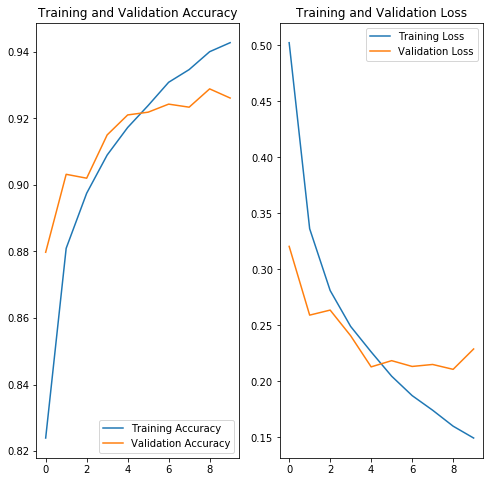

In [21]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./foo.png')
plt.show()

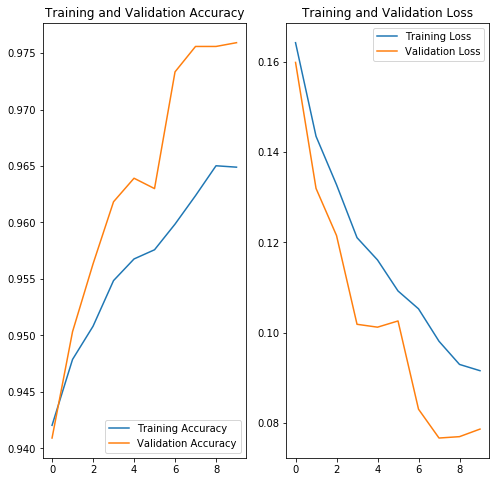

In [36]:
acc = history1.history['acc']
val_acc = history1.history['val_acc']

loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./foo.png')
plt.show()